In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import fastf1 as f1
from ing_theme_matplotlib import mpl_style
import mplcyberpunk
from fastf1 import plotting

In [2]:
def convert_to_normal(time):
    if pd.isna(time):
        return time

    time_str = str(time)
    parts = time_str.split()

    days = int(parts[0])
    minutes, seconds_with_microseconds = parts[2].split(":")[1:]
    seconds, microseconds = seconds_with_microseconds.split(".")

    minutes = int(minutes)
    seconds = int(seconds)
    microseconds = int(microseconds)

    total_microseconds = (
        days * 86400000000 + minutes * 60000000 + seconds * 1000000 + microseconds
    )

    minutes, remaining_microseconds = divmod(total_microseconds, 60000000)
    seconds, microseconds = divmod(remaining_microseconds, 1000000)

    normal_time = f"{minutes:02d}:{seconds:02d}.{microseconds:06d}"
    return normal_time

*Qualifying*

In [3]:
quali = f1.get_session(2024, "United Arab Emirates", "Qualifying")
quali.load()

req         WARNING 	DEFAULT CACHE ENABLED! (210.23 MB) /home/sohamdesai/.cache/fastf1


core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.4.4]


req            INFO 	Using cached data for session_info


req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data


req            INFO 	Using cached data for track_status_data


req            INFO 	Using cached data for _extended_timing_data


req            INFO 	Using cached data for timing_app_data


core           INFO 	Processing timing data...


req            INFO 	Using cached data for car_data


req            INFO 	Using cached data for position_data


req            INFO 	Using cached data for weather_data


req            INFO 	Using cached data for race_control_messages


core           INFO 	Finished loading data for 20 drivers: ['4', '81', '55', '27', '1', '10', '63', '14', '77', '11', '22', '30', '18', '16', '20', '23', '24', '44', '43', '61']


In [4]:
quali.session_info

{'Meeting': {'Key': 1252,
  'Name': 'Abu Dhabi Grand Prix',
  'OfficialName': 'FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX 2024',
  'Location': 'Yas Island',
  'Number': 24,
  'Country': {'Key': 21, 'Code': 'UAE', 'Name': 'United Arab Emirates'},
  'Circuit': {'Key': 70, 'ShortName': 'Yas Marina Circuit'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9658,
 'Type': 'Qualifying',
 'Name': 'Qualifying',
 'StartDate': datetime.datetime(2024, 12, 7, 18, 0),
 'EndDate': datetime.datetime(2024, 12, 7, 19, 0),
 'GmtOffset': datetime.timedelta(seconds=14400),
 'Path': '2024/2024-12-08_Abu_Dhabi_Grand_Prix/2024-12-07_Qualifying/'}

In [5]:
quali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
4,NOR,McLaren,NaN,1.0,NaT,
81,PIA,McLaren,NaN,2.0,NaT,
55,SAI,Ferrari,NaN,3.0,NaT,
27,HUL,Haas F1 Team,NaN,4.0,NaT,
1,VER,Red Bull Racing,NaN,5.0,NaT,
10,GAS,Alpine,NaN,6.0,NaT,
63,RUS,Mercedes,NaN,7.0,NaT,
14,ALO,Aston Martin,NaN,8.0,NaT,
77,BOT,Kick Sauber,NaN,9.0,NaT,
11,PER,Red Bull Racing,NaN,10.0,NaT,


In [6]:
quali_laps = quali.laps
quali_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:22:41.925000,NOR,4,NaT,1.0,1.0,0 days 00:20:03.650000,NaT,NaT,0 days 00:00:49.350000,...,True,McLaren,0 days 00:20:03.650000,2024-12-07 14:05:03.653,1,NaN,False,,False,False
1,0 days 00:24:05.607000,NOR,4,0 days 00:01:23.682000,2.0,1.0,NaT,NaT,0 days 00:00:17.129000,0 days 00:00:36.301000,...,True,McLaren,0 days 00:22:41.925000,2024-12-07 14:07:41.928,1,NaN,False,,False,True
2,0 days 00:25:57.551000,NOR,4,0 days 00:01:51.944000,3.0,1.0,NaT,0 days 00:25:56.445000,0 days 00:00:21.676000,0 days 00:00:47.997000,...,True,McLaren,0 days 00:24:05.607000,2024-12-07 14:09:05.610,1,NaN,False,,False,False
3,0 days 00:31:52.979000,NOR,4,NaT,4.0,2.0,0 days 00:29:10.623000,NaT,NaT,0 days 00:00:46.011000,...,True,McLaren,0 days 00:25:57.551000,2024-12-07 14:10:57.554,1,NaN,False,,False,False
4,0 days 00:33:25.776000,NOR,4,0 days 00:01:32.797000,5.0,2.0,NaT,0 days 00:33:24.624000,0 days 00:00:17.017000,0 days 00:00:36.024000,...,True,McLaren,0 days 00:31:52.979000,2024-12-07 14:16:52.982,1,NaN,False,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0 days 00:24:22.367000,DOO,61,0 days 00:01:24.132000,2.0,1.0,NaT,NaT,0 days 00:00:17.141000,0 days 00:00:36.432000,...,True,Alpine,0 days 00:22:58.235000,2024-12-07 14:07:58.238,1,NaN,False,,False,True
257,0 days 00:26:13.196000,DOO,61,0 days 00:01:50.829000,3.0,1.0,NaT,0 days 00:26:12.218000,0 days 00:00:19.986000,0 days 00:00:48.762000,...,True,Alpine,0 days 00:24:22.367000,2024-12-07 14:09:22.370,1,NaN,False,,False,False
258,0 days 00:32:53.084000,DOO,61,NaT,4.0,2.0,0 days 00:29:58.807000,NaT,NaT,0 days 00:00:43.656000,...,True,Alpine,0 days 00:26:13.196000,2024-12-07 14:11:13.199,1,NaN,False,,False,False
259,0 days 00:34:17.189000,DOO,61,0 days 00:01:24.105000,5.0,2.0,NaT,NaT,0 days 00:00:17.297000,0 days 00:00:36.258000,...,True,Alpine,0 days 00:32:53.084000,2024-12-07 14:17:53.087,1,NaN,False,,False,True


In [7]:
nor_quali_laps = quali.laps.pick_driver("NOR")
fastest_lap_nor_quali = nor_quali_laps.pick_fastest().LapTime
nor_quali_lap_time = nor_quali_laps["LapTime"]
nor_quali_sec1 = nor_quali_laps["Sector1Time"]
nor_quali_sec2 = nor_quali_laps["Sector2Time"]
nor_quali_sec3 = nor_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_nor_quali), "which was in Lap number" ,nor_quali_laps.pick_fastest().LapNumber)
nor_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:22.595000 which was in Lap number 15.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:49.350000,0 days 00:00:43.489000,246.0,171.0,224.0,272.0
1,0 days 00:01:23.682000,0 days 00:00:17.129000,0 days 00:00:36.301000,0 days 00:00:30.252000,287.0,319.0,221.0,321.0
2,0 days 00:01:51.944000,0 days 00:00:21.676000,0 days 00:00:47.997000,0 days 00:00:42.271000,180.0,215.0,NaN,188.0
3,NaT,NaT,0 days 00:00:46.011000,0 days 00:00:39.218000,244.0,254.0,227.0,248.0
4,0 days 00:01:32.797000,0 days 00:00:17.017000,0 days 00:00:36.024000,0 days 00:00:39.756000,289.0,318.0,NaN,322.0


In [8]:
fastest_lap_nor_quali = nor_quali_laps.pick_fastest()
tele_nor_quali = fastest_lap_nor_quali.get_telemetry().add_distance()
speed_nor_quali = tele_nor_quali.Speed
tele_nor_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,241,6,11027
3,243,6,11094
4,246,6,11229
5,248,6,11340
6,251,6,11451
...,...,...,...
642,218,5,11496
643,221,5,11644
644,225,5,11101
645,229,5,10558


In [9]:
sai_quali_laps = quali.laps.pick_driver("SAI")
fastest_lap_sai_quali = sai_quali_laps.pick_fastest().LapTime
sai_quali_lap_time = sai_quali_laps["LapTime"]
sai_quali_sec1 = sai_quali_laps["Sector1Time"]
sai_quali_sec2 = sai_quali_laps["Sector2Time"]
sai_quali_sec3 = sai_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_sai_quali), "which was in Lap number" ,sai_quali_laps.pick_fastest().LapNumber)
sai_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:22.824000 which was in Lap number 15.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
32,NaT,NaT,0 days 00:00:45.621000,0 days 00:00:44.492000,246.0,259.0,225.0,283.0
33,0 days 00:01:23.487000,0 days 00:00:17.128000,0 days 00:00:36.193000,0 days 00:00:30.166000,287.0,324.0,220.0,325.0
34,0 days 00:01:53.438000,0 days 00:00:23.899000,0 days 00:00:46.884000,0 days 00:00:42.655000,203.0,225.0,NaN,229.0
35,NaT,NaT,0 days 00:00:43.620000,0 days 00:00:48.997000,249.0,294.0,NaN,248.0
36,NaT,NaT,0 days 00:00:45.904000,0 days 00:00:42.070000,246.0,274.0,225.0,267.0


In [10]:
fastest_lap_sai_quali = sai_quali_laps.pick_fastest()
tele_sai_quali = fastest_lap_sai_quali.get_telemetry().add_distance()
speed_sai_quali = tele_sai_quali.Speed
tele_sai_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,237,6,10880
3,239,6,11007
4,241,6,11139
5,244,6,11272
6,245,6,11348
...,...,...,...
644,223,5,11950
645,227,5,11245
646,231,6,10541
647,232,6,10671


In [11]:
hul_quali_laps = quali.laps.pick_driver("HUL")
fastest_lap_hul_quali = hul_quali_laps.pick_fastest().LapTime
hul_quali_lap_time = hul_quali_laps["LapTime"]
hul_quali_sec1 = hul_quali_laps["Sector1Time"]
hul_quali_sec2 = hul_quali_laps["Sector2Time"]
hul_quali_sec3 = hul_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_hul_quali), "which was in Lap number" ,hul_quali_laps.pick_fastest().LapNumber)
hul_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:22.886000 which was in Lap number 16.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
48,NaT,NaT,0 days 00:00:45.019000,0 days 00:00:37.747000,258.0,164.0,223.0,278.0
49,0 days 00:01:23.722000,0 days 00:00:17.213000,0 days 00:00:36.107000,0 days 00:00:30.402000,292.0,325.0,220.0,327.0
50,0 days 00:01:38.035000,0 days 00:00:19.434000,0 days 00:00:40.322000,0 days 00:00:38.279000,266.0,281.0,NaN,281.0
51,NaT,NaT,0 days 00:00:39.600000,0 days 00:00:37.546000,257.0,285.0,227.0,306.0
52,0 days 00:01:43.869000,0 days 00:00:17.176000,0 days 00:00:43.467000,0 days 00:00:43.226000,291.0,255.0,NaN,281.0


In [12]:
fastest_lap_hul_quali = hul_quali_laps.pick_fastest()
tele_hul_quali = fastest_lap_hul_quali.get_telemetry().add_distance()
speed_hul_quali = tele_hul_quali.Speed
tele_hul_quali.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.


core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.


core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,242,6,11009
3,244,6,11064
4,247,6,11268
5,250,6,11472
6,252,6,11525
...,...,...,...
637,223,5,11779
638,225,5,11740
639,228,5,10836
640,231,5,10788


In [13]:
ver_quali_laps = quali.laps.pick_driver("VER")
fastest_lap_ver_quali = ver_quali_laps.pick_fastest().LapTime
ver_quali_lap_time = ver_quali_laps["LapTime"]
ver_quali_sec1 = ver_quali_laps["Sector1Time"]
ver_quali_sec2 = ver_quali_laps["Sector2Time"]
ver_quali_sec3 = ver_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_quali), "which was in Lap number" ,ver_quali_laps.pick_fastest().LapNumber)
ver_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:22.945000 which was in Lap number 11.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
65,NaT,NaT,0 days 00:00:48.283000,0 days 00:00:40.347000,265.0,228.0,226.0,226.0
66,0 days 00:01:23.516000,0 days 00:00:17.124000,0 days 00:00:35.990000,0 days 00:00:30.402000,290.0,326.0,219.0,329.0
67,0 days 00:01:56.133000,0 days 00:00:24.602000,0 days 00:00:48.288000,0 days 00:00:43.243000,153.0,239.0,NaN,216.0
68,NaT,NaT,0 days 00:00:48.426000,0 days 00:00:38.462000,232.0,197.0,226.0,197.0
69,0 days 00:01:23.612000,0 days 00:00:17.180000,0 days 00:00:35.902000,0 days 00:00:30.530000,290.0,324.0,219.0,332.0


In [14]:
fastest_lap_ver_quali = ver_quali_laps.pick_fastest()
tele_ver_quali = fastest_lap_ver_quali.get_telemetry().add_distance()
speed_ver_quali = tele_ver_quali.Speed
tele_ver_quali.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.


core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.


core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,238,6,10571
3,239,6,10528
4,242,6,10802
5,245,6,11077
6,248,6,11159
...,...,...,...
650,200,4,11391
651,206,5,10849
652,209,5,10956
653,212,5,11063


In [15]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_quali_sec1),
        "Sector1Time": nor_quali_sec1,
        "Sector2Time": nor_quali_sec2,
        "Sector3Time": nor_quali_sec3,
        "Lap Time": nor_quali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Carlos Sainz"] * len(sai_quali_sec1),
        "Sector1Time": sai_quali_sec1,
        "Sector2Time": sai_quali_sec2,
        "Sector3Time": sai_quali_sec3,
        "Lap Time": sai_quali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Nico Hulkenberg"] * len(hul_quali_sec1),
        "Sector1Time": hul_quali_sec1,
        "Sector2Time": hul_quali_sec2,
        "Sector3Time": hul_quali_sec3,
        "Lap Time": hul_quali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_quali_sec1),
        "Sector1Time": ver_quali_sec1,
        "Sector2Time": ver_quali_sec2,
        "Sector3Time": ver_quali_sec3,
        "Lap Time": ver_quali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Lando Norris,0 days 00:00:17.129000,0 days 00:00:36.301000,0 days 00:00:30.252000,0 days 00:01:23.682000
2,Lando Norris,0 days 00:00:21.676000,0 days 00:00:47.997000,0 days 00:00:42.271000,0 days 00:01:51.944000
4,Lando Norris,0 days 00:00:17.017000,0 days 00:00:36.024000,0 days 00:00:39.756000,0 days 00:01:32.797000
6,Lando Norris,0 days 00:00:17.040000,0 days 00:00:35.971000,0 days 00:00:30.087000,0 days 00:01:23.098000
7,Lando Norris,0 days 00:00:19.824000,0 days 00:00:45.040000,0 days 00:00:41.602000,0 days 00:01:46.466000
9,Lando Norris,0 days 00:00:17.018000,0 days 00:00:44.264000,0 days 00:00:47.089000,0 days 00:01:48.371000
11,Lando Norris,0 days 00:00:17.009000,0 days 00:00:36.014000,0 days 00:00:29.926000,0 days 00:01:22.949000
12,Lando Norris,0 days 00:00:20.327000,0 days 00:00:43.134000,0 days 00:00:38.199000,0 days 00:01:41.660000
14,Lando Norris,0 days 00:00:16.958000,0 days 00:00:35.776000,0 days 00:00:29.861000,0 days 00:01:22.595000
15,Lando Norris,0 days 00:00:21.461000,0 days 00:00:49.238000,0 days 00:00:47.647000,0 days 00:01:58.346000


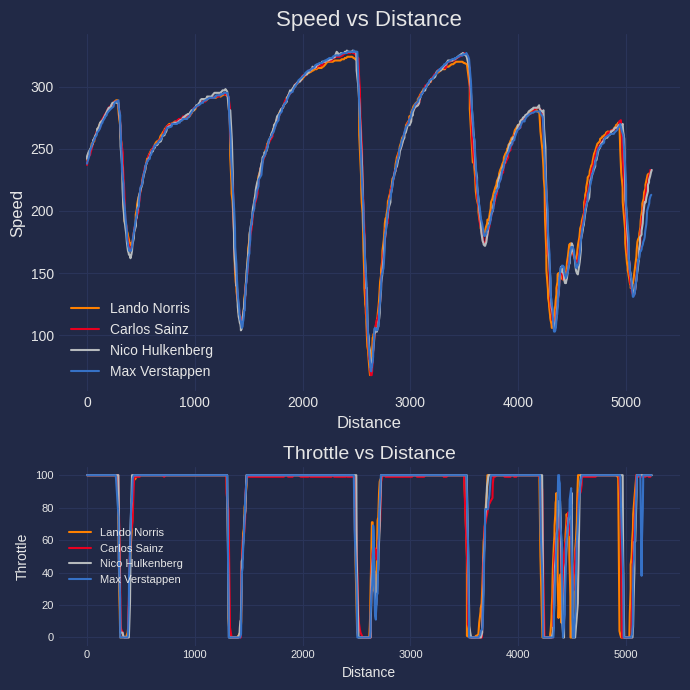

In [16]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = quali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_nor_quali.Distance, tele_nor_quali.Speed, label="Lando Norris", color=get_driver_color("NOR")
)
ax[0].plot(
    tele_sai_quali.Distance, tele_sai_quali.Speed, label="Carlos Sainz", color=get_driver_color("SAI")
)
ax[0].plot(
    tele_hul_quali.Distance, tele_hul_quali.Speed, label="Nico Hulkenberg", color=get_driver_color("HUL")
)
ax[0].plot(
    tele_ver_quali.Distance, tele_ver_quali.Speed, label="Max Verstappen", color=get_driver_color("VER")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_nor_quali.Distance, tele_nor_quali.Throttle, label="Lando Norris", color=get_driver_color("NOR")
)
ax[1].plot(
    tele_sai_quali.Distance, tele_sai_quali.Throttle, label="Carlos Sainz", color=get_driver_color("SAI")
)
ax[1].plot(
    tele_hul_quali.Distance, tele_hul_quali.Throttle, label="Nico Hulkenberg", color=get_driver_color("HUL")
)
ax[1].plot(
    tele_ver_quali.Distance, tele_ver_quali.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


*Race*

In [17]:
race = f1.get_session(2024, "United Arab Emirates", "R")
race.load()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.4.4]


req            INFO 	Using cached data for session_info


req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data


req            INFO 	Using cached data for lap_count


req            INFO 	Using cached data for track_status_data


req            INFO 	Using cached data for _extended_timing_data


req            INFO 	Using cached data for timing_app_data


core           INFO 	Processing timing data...


req            INFO 	Using cached data for car_data


req            INFO 	Using cached data for position_data


req            INFO 	Using cached data for weather_data


req            INFO 	Using cached data for race_control_messages


core           INFO 	Finished loading data for 20 drivers: ['4', '55', '16', '44', '63', '1', '10', '27', '14', '81', '23', '22', '24', '18', '61', '20', '30', '77', '43', '11']


In [18]:
race.session_info

{'Meeting': {'Key': 1252,
  'Name': 'Abu Dhabi Grand Prix',
  'OfficialName': 'FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX 2024',
  'Location': 'Yas Island',
  'Number': 24,
  'Country': {'Key': 21, 'Code': 'UAE', 'Name': 'United Arab Emirates'},
  'Circuit': {'Key': 70, 'ShortName': 'Yas Marina Circuit'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9662,
 'Type': 'Race',
 'Name': 'Race',
 'StartDate': datetime.datetime(2024, 12, 8, 17, 0),
 'EndDate': datetime.datetime(2024, 12, 8, 19, 0),
 'GmtOffset': datetime.timedelta(seconds=14400),
 'Path': '2024/2024-12-08_Abu_Dhabi_Grand_Prix/2024-12-08_Race/'}

In [19]:
race.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
4,NOR,McLaren,1.0,1.0,0 days 01:26:33.291000,Finished
55,SAI,Ferrari,3.0,2.0,0 days 00:00:05.832000,Finished
16,LEC,Ferrari,19.0,3.0,0 days 00:00:31.928000,Finished
44,HAM,Mercedes,16.0,4.0,0 days 00:00:36.483000,Finished
63,RUS,Mercedes,6.0,5.0,0 days 00:00:37.538000,Finished
1,VER,Red Bull Racing,4.0,6.0,0 days 00:00:49.847000,Finished
10,GAS,Alpine,5.0,7.0,0 days 00:01:12.560000,Finished
27,HUL,Haas F1 Team,7.0,8.0,0 days 00:01:15.554000,Finished
14,ALO,Aston Martin,8.0,9.0,0 days 00:01:22.373000,Finished
81,PIA,McLaren,2.0,10.0,0 days 00:01:23.821000,Finished


In [20]:
race_laps = race.laps
race_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:58:27.641000,VER,1,0 days 00:01:39.510000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:39.931000,...,True,Red Bull Racing,0 days 00:56:47.817000,2024-12-08 13:03:35.034,12,12.0,False,,False,False
1,0 days 01:00:22.579000,VER,1,0 days 00:01:54.938000,2.0,1.0,NaT,NaT,0 days 00:00:18.209000,0 days 00:00:54.569000,...,True,Red Bull Racing,0 days 00:58:27.641000,2024-12-08 13:05:14.858,126,11.0,False,,False,False
2,0 days 01:02:00.630000,VER,1,0 days 00:01:38.051000,3.0,1.0,NaT,NaT,0 days 00:00:23.196000,0 days 00:00:41.997000,...,True,Red Bull Racing,0 days 01:00:22.579000,2024-12-08 13:07:09.796,671,10.0,False,,False,False
3,0 days 01:03:30.134000,VER,1,0 days 00:01:29.504000,4.0,1.0,NaT,NaT,0 days 00:00:18.166000,0 days 00:00:38.187000,...,True,Red Bull Racing,0 days 01:02:00.630000,2024-12-08 13:08:47.847,1,10.0,False,,False,True
4,0 days 01:04:59.947000,VER,1,0 days 00:01:29.813000,5.0,1.0,NaT,NaT,0 days 00:00:18.056000,0 days 00:00:37.945000,...,True,Red Bull Racing,0 days 01:03:30.134000,2024-12-08 13:10:17.351,1,10.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0 days 02:18:53.082000,PIA,81,0 days 00:01:27.731000,54.0,3.0,NaT,NaT,0 days 00:00:17.591000,0 days 00:00:38.078000,...,True,McLaren,0 days 02:17:25.351000,2024-12-08 14:24:12.568,1,10.0,False,,False,True
1031,0 days 02:20:20.863000,PIA,81,0 days 00:01:27.781000,55.0,3.0,NaT,NaT,0 days 00:00:17.639000,0 days 00:00:38.014000,...,True,McLaren,0 days 02:18:53.082000,2024-12-08 14:25:40.299,1,10.0,False,,False,True
1032,0 days 02:21:48.679000,PIA,81,0 days 00:01:27.816000,56.0,3.0,NaT,NaT,0 days 00:00:17.603000,0 days 00:00:38,...,True,McLaren,0 days 02:20:20.863000,2024-12-08 14:27:08.080,1,10.0,False,,False,True
1033,0 days 02:23:17.233000,PIA,81,0 days 00:01:28.554000,57.0,3.0,NaT,NaT,0 days 00:00:17.650000,0 days 00:00:38.546000,...,True,McLaren,0 days 02:21:48.679000,2024-12-08 14:28:35.896,12,10.0,False,,False,True


In [21]:
nor_race_laps = race.laps.pick_driver("NOR")
fastest_lap_nor_race = nor_race_laps.pick_fastest().LapTime
nor_race_lap_time = nor_race_laps["LapTime"]
nor_race_sec1 = nor_race_laps["Sector1Time"]
nor_race_sec2 = nor_race_laps["Sector2Time"]
nor_race_sec3 = nor_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_nor_race), "which was in Lap number" ,nor_race_laps.pick_fastest().LapNumber)
nor_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:27.438000 which was in Lap number 52.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
632,0 days 00:01:31.142000,NaT,0 days 00:00:38.405000,0 days 00:00:32.676000,281.0,283.0,217.0,293.0
633,0 days 00:01:48.349000,0 days 00:00:18.242000,0 days 00:00:46.262000,0 days 00:00:43.845000,280.0,221.0,147.0,295.0
634,0 days 00:01:43.313000,0 days 00:00:25.352000,0 days 00:00:45.077000,0 days 00:00:32.884000,258.0,295.0,214.0,209.0
635,0 days 00:01:29.010000,0 days 00:00:18.280000,0 days 00:00:38.144000,0 days 00:00:32.586000,282.0,295.0,214.0,301.0
636,0 days 00:01:29.104000,0 days 00:00:18.253000,0 days 00:00:38.234000,0 days 00:00:32.617000,281.0,294.0,215.0,301.0


In [22]:
fastest_lap_nor_race = nor_race_laps.pick_fastest()
tele_nor_race = fastest_lap_nor_race.get_telemetry().add_distance()
speed_nor_race = tele_nor_race.Speed
tele_nor_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,227,5,11163
3,229,5,11036
4,233,6,10781
5,238,6,10993
6,243,6,11205
...,...,...,...
668,211,5,11162
669,217,5,11426
670,220,5,11481
671,223,5,11537


In [23]:
sai_race_laps = race.laps.pick_driver("SAI")
fastest_lap_sai_race = sai_race_laps.pick_fastest().LapTime
sai_race_lap_time = sai_race_laps["LapTime"]
sai_race_sec1 = sai_race_laps["Sector1Time"]
sai_race_sec2 = sai_race_laps["Sector2Time"]
sai_race_sec3 = sai_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_sai_race), "which was in Lap number" ,sai_race_laps.pick_fastest().LapNumber)
sai_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:27.765000 which was in Lap number 55.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
774,0 days 00:01:32.999000,NaT,0 days 00:00:38.437000,0 days 00:00:32.859000,285.0,289.0,213.0,298.0
775,0 days 00:01:49.770000,0 days 00:00:18.329000,0 days 00:00:45.655000,0 days 00:00:45.786000,279.0,182.0,117.0,294.0
776,0 days 00:01:42.795000,0 days 00:00:25.783000,0 days 00:00:44.623000,0 days 00:00:32.389000,240.0,298.0,212.0,296.0
777,0 days 00:01:28.995000,0 days 00:00:18.166000,0 days 00:00:38.123000,0 days 00:00:32.706000,283.0,294.0,212.0,301.0
778,0 days 00:01:29.250000,0 days 00:00:18.101000,0 days 00:00:38.189000,0 days 00:00:32.960000,282.0,295.0,211.0,302.0


In [24]:
fastest_lap_sai_race = sai_race_laps.pick_fastest()
tele_sai_race = fastest_lap_sai_race.get_telemetry().add_distance()
speed_sai_race = tele_sai_race.Speed
tele_sai_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,224,5,11212
3,227,5,11073
4,231,6,10690
5,232,6,10830
6,234,6,10971
...,...,...,...
660,210,5,11283
661,214,5,11449
662,217,5,11578
663,220,5,11708


In [25]:
ham_race_laps = race.laps.pick_driver("HAM")
fastest_lap_ham_race = ham_race_laps.pick_fastest().LapTime
ham_race_lap_time = ham_race_laps["LapTime"]
ham_race_sec1 = ham_race_laps["Sector1Time"]
ham_race_sec2 = ham_race_laps["Sector2Time"]
ham_race_sec3 = ham_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ham_race), "which was in Lap number" ,ham_race_laps.pick_fastest().LapNumber)
ham_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:27.278000 which was in Lap number 44.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
716,0 days 00:01:39.884000,NaT,0 days 00:00:40.695000,0 days 00:00:34.848000,283.0,305.0,209.0,317.0
717,0 days 00:01:56.731000,0 days 00:00:18.500000,0 days 00:00:55.233000,0 days 00:00:42.998000,285.0,221.0,207.0,303.0
718,0 days 00:01:37.736000,0 days 00:00:21.874000,0 days 00:00:42.821000,0 days 00:00:33.041000,247.0,306.0,210.0,311.0
719,0 days 00:01:29.666000,0 days 00:00:18.052000,0 days 00:00:38.080000,0 days 00:00:33.534000,288.0,309.0,209.0,317.0
720,0 days 00:01:29.733000,0 days 00:00:18.087000,0 days 00:00:38.059000,0 days 00:00:33.587000,NaN,307.0,207.0,321.0


In [26]:
fastest_lap_ham_race = ham_race_laps.pick_fastest()
tele_ham_race = fastest_lap_ham_race.get_telemetry().add_distance()
speed_ham_race = tele_ham_race.Speed
tele_ham_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,226,6,10626
3,227,6,10626
4,229,6,10626
5,232,6,10894
6,236,6,11162
...,...,...,...
681,221,5,11818
682,222,5,11451
683,224,5,11084
684,226,5,10718


In [27]:
ver_race_laps = race.laps.pick_driver("VER")
fastest_lap_ver_race = ver_race_laps.pick_fastest().LapTime
ver_race_lap_time = ver_race_laps["LapTime"]
ver_race_sec1 = ver_race_laps["Sector1Time"]
ver_race_sec2 = ver_race_laps["Sector2Time"]
ver_race_sec3 = ver_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_race), "which was in Lap number" ,ver_race_laps.pick_fastest().LapNumber)
ver_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:27.765000 which was in Lap number 56.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,0 days 00:01:39.510000,NaT,0 days 00:00:39.931000,0 days 00:00:34.944000,290.0,302.0,208.0,289.0
1,0 days 00:01:54.938000,0 days 00:00:18.209000,0 days 00:00:54.569000,0 days 00:00:42.160000,291.0,239.0,191.0,320.0
2,0 days 00:01:38.051000,0 days 00:00:23.196000,0 days 00:00:41.997000,0 days 00:00:32.858000,239.0,303.0,211.0,321.0
3,0 days 00:01:29.504000,0 days 00:00:18.166000,0 days 00:00:38.187000,0 days 00:00:33.151000,286.0,303.0,207.0,312.0
4,0 days 00:01:29.813000,0 days 00:00:18.056000,0 days 00:00:37.945000,0 days 00:00:33.812000,288.0,306.0,207.0,319.0


In [28]:
fastest_lap_ver_race = ver_race_laps.pick_fastest()
tele_ver_race = fastest_lap_ver_race.get_telemetry().add_distance()
speed_ver_race = tele_ver_race.Speed
tele_ver_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,230,5,11410
3,232,5,11166
4,237,6,10677
5,239,6,10789
6,241,6,10901
...,...,...,...
662,214,5,11041
663,220,5,11289
664,225,5,11523
665,226,5,11614


In [29]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_race_sec1),
        "Sector1Time": nor_race_sec1,
        "Sector2Time": nor_race_sec2,
        "Sector3Time": nor_race_sec3,
        "Lap Time": nor_race_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Carlos Sainz"] * len(sai_race_sec1),
        "Sector1Time": sai_race_sec1,
        "Sector2Time": sai_race_sec2,
        "Sector3Time": sai_race_sec3,
        "Lap Time": sai_race_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Lewis Hamilton"] * len(ham_race_sec1),
        "Sector1Time": ham_race_sec1,
        "Sector2Time": ham_race_sec2,
        "Sector3Time": ham_race_sec3,
        "Lap Time": ham_race_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Lando Norris,0 days 00:00:18.242000,0 days 00:00:46.262000,0 days 00:00:43.845000,0 days 00:01:48.349000
2,Lando Norris,0 days 00:00:25.352000,0 days 00:00:45.077000,0 days 00:00:32.884000,0 days 00:01:43.313000
3,Lando Norris,0 days 00:00:18.280000,0 days 00:00:38.144000,0 days 00:00:32.586000,0 days 00:01:29.010000
4,Lando Norris,0 days 00:00:18.253000,0 days 00:00:38.234000,0 days 00:00:32.617000,0 days 00:01:29.104000
5,Lando Norris,0 days 00:00:18.181000,0 days 00:00:38.422000,0 days 00:00:32.758000,0 days 00:01:29.361000
...,...,...,...,...,...
227,Max Verstappen,0 days 00:00:17.701000,0 days 00:00:38.164000,0 days 00:00:32.487000,0 days 00:01:28.352000
228,Max Verstappen,0 days 00:00:17.648000,0 days 00:00:37.893000,0 days 00:00:32.280000,0 days 00:01:27.821000
229,Max Verstappen,0 days 00:00:17.571000,0 days 00:00:38.063000,0 days 00:00:32.131000,0 days 00:01:27.765000
230,Max Verstappen,0 days 00:00:17.565000,0 days 00:00:38.204000,0 days 00:00:32.405000,0 days 00:01:28.174000


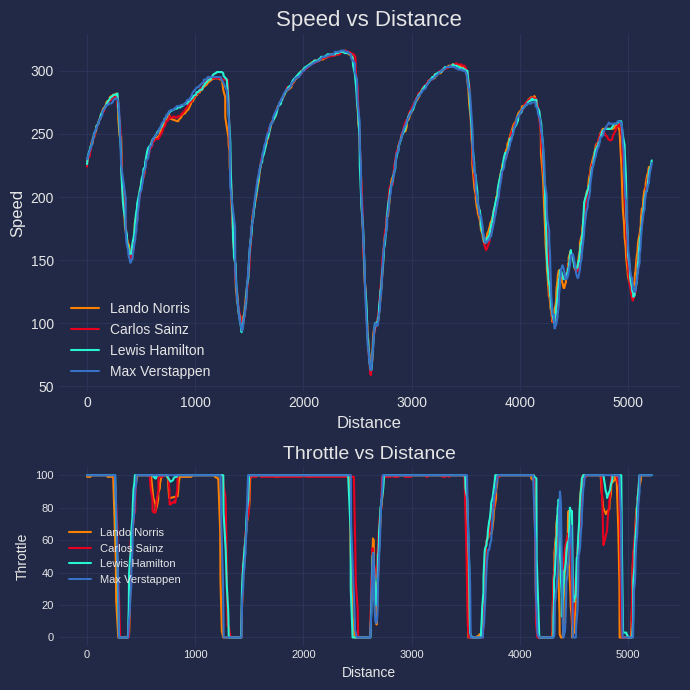

In [30]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = race.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_nor_race.Distance, tele_nor_race.Speed, label="Lando Norris", color=get_driver_color("NOR")
)
ax[0].plot(
    tele_sai_race.Distance, tele_sai_race.Speed, label="Carlos Sainz", color=get_driver_color("SAI")
)
ax[0].plot(
    tele_ham_race.Distance, tele_ham_race.Speed, label="Lewis Hamilton", color=get_driver_color("HAM")
)
ax[0].plot(
    tele_ver_race.Distance, tele_ver_race.Speed, label="Max Verstappen", color=get_driver_color("VER")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_nor_race.Distance, tele_nor_race.Throttle, label="Lando Norris", color=get_driver_color("NOR")
)
ax[1].plot(
    tele_sai_race.Distance, tele_sai_race.Throttle, label="Carlos Sainz", color=get_driver_color("SAI")
)
ax[1].plot(
    tele_ham_race.Distance, tele_ham_race.Throttle, label="Lewis Hamilton", color=get_driver_color("HAM")
)
ax[1].plot(
    tele_ver_race.Distance, tele_ver_race.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


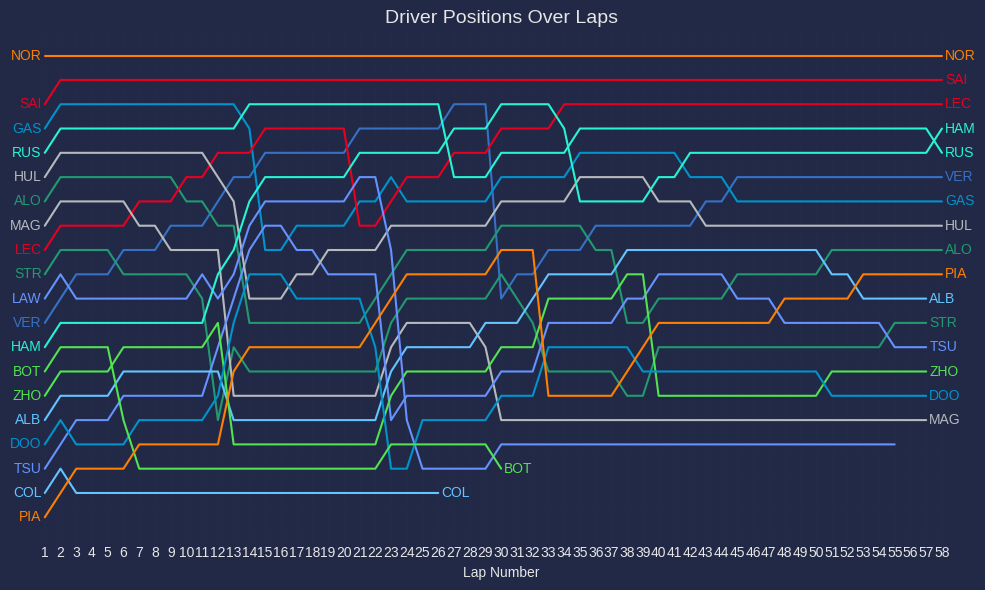

In [31]:
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
nlaps = int(race.laps.LapNumber.unique().max())

team_colors = {}

for driver in drivers_ab:
    driver_object = race.get_driver(driver)
    hex_color = driver_object.TeamColor
    team_colors[driver] = hex_to_rgb(hex_color)

plt.figure(figsize=(10, 6))
for driver in drivers_ab:
    positions = race_laps[race_laps['Driver'] == driver]['Position'].values  
    color = team_colors.get(driver, (0.5, 0.5, 0.5))
    plt.plot(range(1, len(positions) + 1), positions, label=driver, color=color)
    
    plt.text(
        1 - 0.2,
        positions[0],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='right'
    )
    
    plt.text(
        len(positions) + 0.2,
        positions[-1],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='left'
    )

plt.title("Driver Positions Over Laps", fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0.5, float(nlaps) + 1.5)
plt.xlabel("Lap Number")
plt.ylim(0, 21)
plt.gca().invert_yaxis()
plt.gca().set_yticks([])
plt.xticks(range(1, nlaps + 1))
plt.tight_layout()
plt.show()

/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_dr

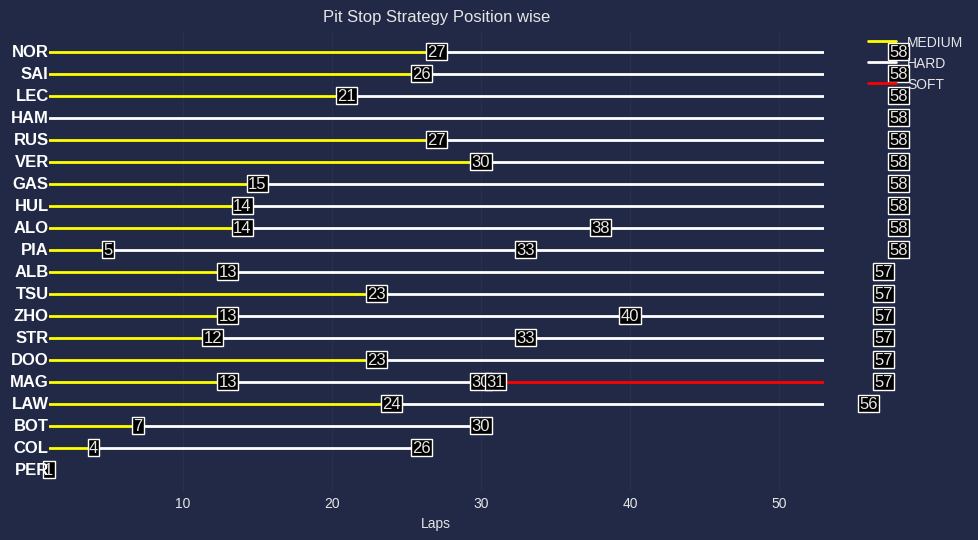

In [32]:
def getDriverPosition(abbreviation: str):
    res = race.results
    abbr = res["Abbreviation"] == abbreviation
    pos = res.loc[abbr, ["Position"]]
    posi = pos.iloc[-1]
    return int(posi.iloc[0])


def getCompound(abbreviation: str):
    driver_race = race.laps.pick_driver(abbreviation)
    lastLap = driver_race.LapNumber.count()
    if driver_race["TyreLife"].iloc[0] == 1.0:
        condition = driver_race["TyreLife"] == 1
        driver_comp = driver_race.loc[condition, ["Compound", "LapNumber"]]
        compound = driver_comp.Compound.tolist()
        return compound, driver_comp, lastLap
    else:
        compound = []
        result = []
        for i in range(0, len(driver_race["TyreLife"])):
            if driver_race["TyreLife"].iloc[i] < driver_race["TyreLife"].iloc[i - 1]:
                result.append(
                    {
                        "Compound": driver_race["Compound"].iloc[i],
                        "LapNumber": driver_race["LapNumber"].iloc[i],
                    }
                )
                compound.append(driver_race["Compound"].iloc[i])

        driver_comp = pd.DataFrame(result)
        return compound, driver_comp, lastLap


fig, ax = plt.subplots(figsize=(10, 6))

color_mapping = {
    "MEDIUM": "yellow",
    "SOFT": "red",
    "HARD": "white",
    "INTERMEDIATE": "green",
    "WET": "blue",
}
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
used_labels = set()
for driver in drivers_ab:
    compound, driver_comp, lastLap = getCompound(driver)

    list1 = driver_comp.LapNumber.tolist()
    list1.append(lastLap)
    int_list = [int(x) for x in list1]
    x_points = int_list
    n = len(int_list)
    posi = getDriverPosition(driver)
    y_points = [posi] * n

    for i in range(len(driver_comp.LapNumber)):
        x_segment = [x_points[i], x_points[i + 1]]
        y_segment = [y_points[i], y_points[i + 1]]
        tire_color = color_mapping.get(compound[i], "#000000")
        label = compound[i] if compound[i] not in used_labels else None
        
        ax.plot(x_segment, y_segment, color=tire_color, linewidth=2, label=label)
        used_labels.add(compound[i])

        ax.text(
            x_points[i + 1],
            y_points[i + 1],
            str(x_points[i + 1]),
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", edgecolor="white", pad=1),
        )
        ax.annotate(f'{i}',
                xy=(0, 1),
                xytext=(-10, 0),
                textcoords='offset points',
                va='center',
                ha='right',
                color="white",
                fontweight='bold')
    ax.text(
        x_points[0], 
        y_points[0], 
        driver, 
        fontsize=12, 
        ha='right', 
        va='center', 
        color="white", 
        fontweight='bold',
    )
    
ax.set_xlim(1, 53)
ax.invert_yaxis()
ax.set_ylim(21, 0)
ax.set_title("Pit Stop Strategy Position wise")
ax.set_xlabel("Laps")
plt.gca().set_yticks([])
ax.axvline(x=0, color='black', linewidth=2)
ax.grid(True, linestyle="-", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()

In [33]:
res = race.results
drivers = res['Abbreviation'].tolist()
fastest_speed = pd.DataFrame(columns=['Driver', 'Speed'])
for i in drivers:
    tele = race.laps.pick_driver(i)
    speed = tele.SpeedST.max()
    df = pd.DataFrame({'Driver': [i], 'Speed': [speed]})
    fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)
fastest_speed.sort_values(by="Speed",ascending=True)


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/tmp/ipykernel_91125/905247657.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)


,Driver,Speed
18,COL,312.0
0,NOR,315.0
1,SAI,315.0
16,LAW,316.0
7,HUL,320.0
6,GAS,322.0
17,BOT,324.0
14,DOO,325.0
12,ZHO,326.0
11,TSU,326.0


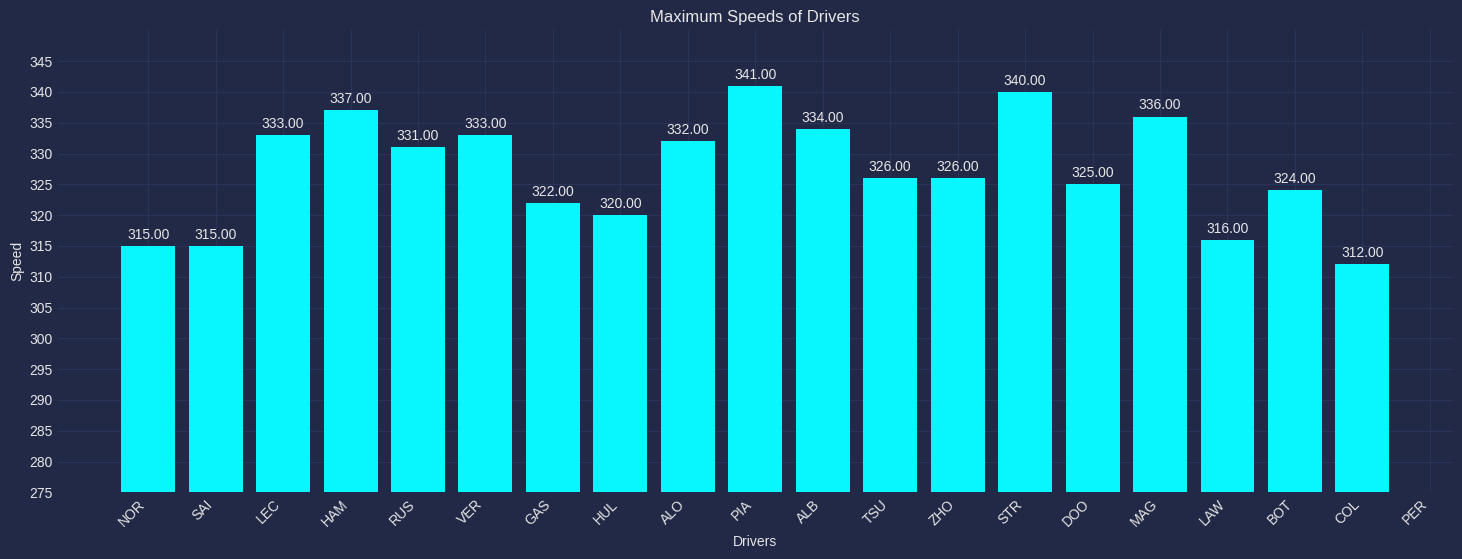

In [34]:
fig,ax = plt.subplots(figsize=(18, 6))
bars = ax.bar(fastest_speed['Driver'], fastest_speed['Speed'])
ax.set_xlabel('Drivers')
ax.set_ylabel('Speed')
ax.set_title('Maximum Speeds of Drivers')
plt.xticks(rotation=45, ha='right')

y_min = 275
y_max = np.ceil(fastest_speed['Speed'].max() / 5) * 5 + 5
y_ticks = np.arange(y_min, y_max, 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

*Pace Comparison*

In [35]:
plotting.setup_mpl()

/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


In [36]:
laps_ver = race_laps.pick_driver("VER")
laps_nor = race_laps.pick_driver("NOR")

fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_nor = laps_nor.pick_fastest().get_telemetry().add_distance()

fastest_ver["Driver"] = "VER"
fastest_nor["Driver"] = "NOR"
telemetry = pd.concat([fastest_ver,fastest_nor])

/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [37]:
num_minisectors = 25
total_distance = total_distance = max(telemetry['Distance'])
minisector_length = total_distance / num_minisectors
minisectors = [0]
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [38]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,NOR,255.391304
1,1,VER,255.227273
2,2,NOR,216.241379
3,2,VER,212.043478
4,3,NOR,211.000000
5,3,VER,202.517241
6,4,NOR,254.625000
7,4,VER,262.217391
8,5,NOR,270.478261
9,5,VER,278.619048


In [39]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [40]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

telemetry = telemetry.sort_values(by=['Distance'])

telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'NOR', 'Fastest_driver_int'] = 2

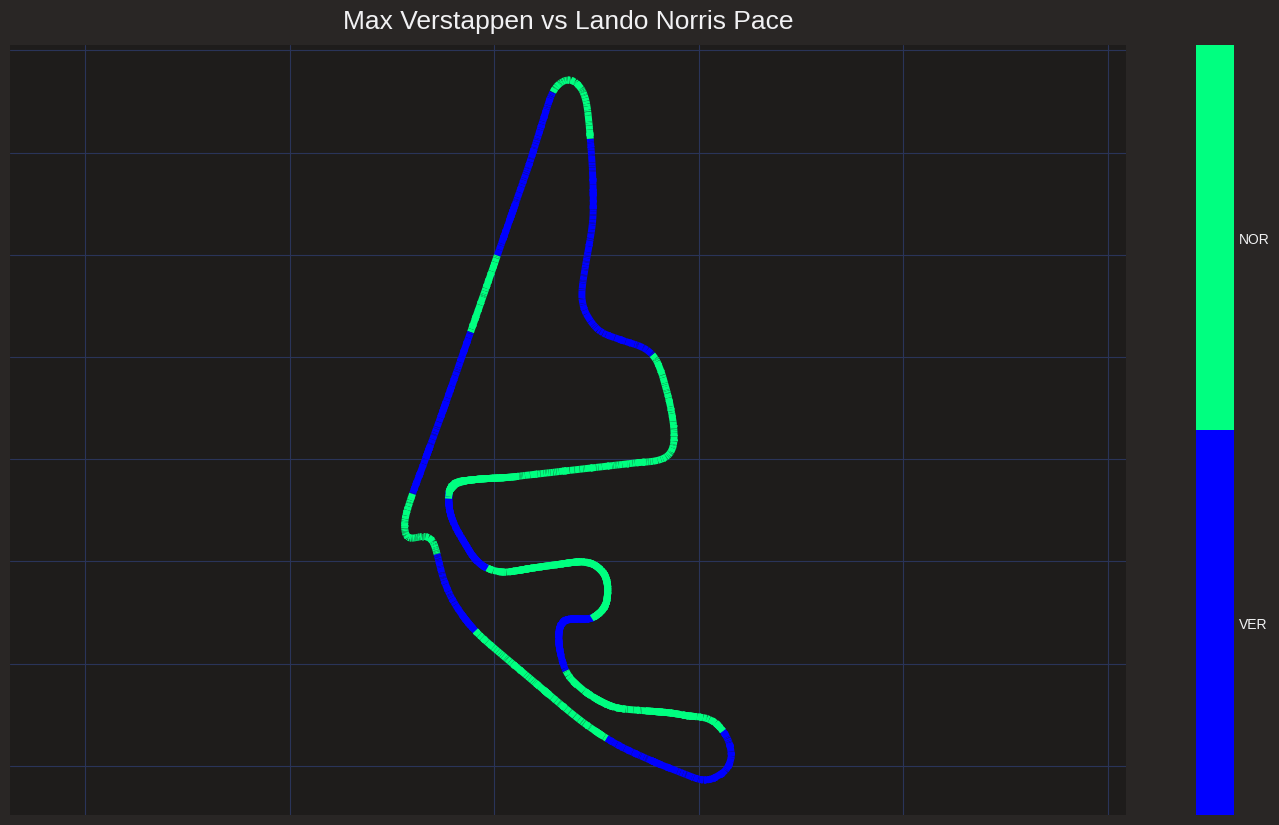

In [41]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['VER', 'NOR'])
plt.title("Max Verstappen vs Lando Norris Pace")
plt.show()
